w=(0.866025, 0.500000) (0.866025, -0.500000) (0.000000, 1.000000) 
w=(0.866025, 0.500000) (0.866025, -0.500000) (0.000000, 1.000000) 


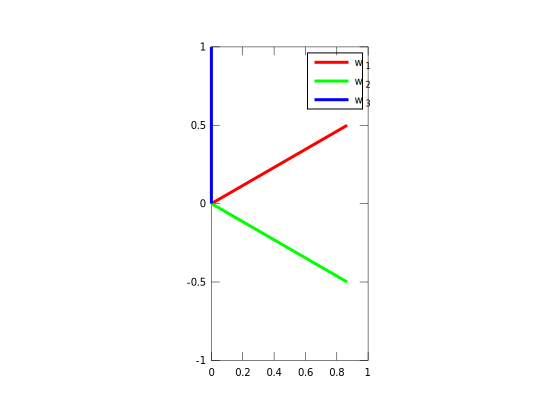

In [63]:
%plot --format svg

# setting up robot model
# define the geometry of the robot in radiants
alpha(1)=pi/6;
alpha(2)=-pi/6;
alpha(3)=pi/2;

# wheel radius (in m):
wr = .05;

# this will define all the vectors defining the direction of wheels:
w=[];

for (i=1:3)
    w(1,i)=cos(alpha(i));
    w(2,i)=sin(alpha(i));
end;
fprintf('w='),fprintf("(%f, %f) ", w);

# below is all plotting (ignore)
cla;
cmap=colormap(eye(3));
hold on;
for (i=1:3)
    plot([0 w(1,i)],[0 w(2,i)],'Color',cmap(i,:),'LineWidth',3);
end;
h=legend('w_1','w_2','w_3');
set(gca,'DataAspectRatio',[1 1 1]);


In [61]:
# We are defining a linear motion (not angular motion of the robot!), but on this omnidirectional robot:

# desired velocity
v=1;
# desired direction
delta=1*pi/6; % 45 degrees


d =

   0.86603
   0.50000

omega =

   20.000   10.000   10.000



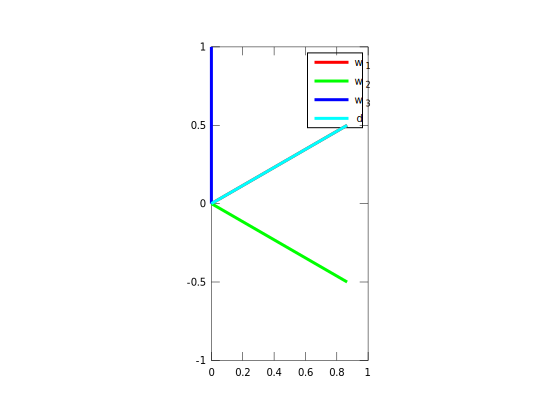

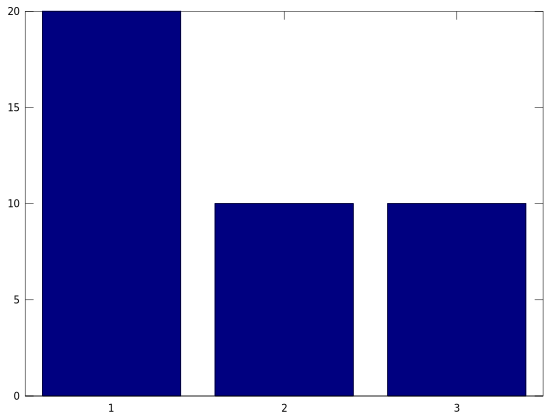

In [67]:

# compute the actual desired velocity vector
d=[cos(delta); sin(delta)] * v

# It's simple now to compute the required "wheel velocity compnent"
# It's the prection of the velocity vector d onto the wheel direction vectors 
for (i=1:3)
    wv(i)=w(:,i)'*d;
end;

# wr is the radius of the wheels, get angular velocities here by dividing by radius
omega = wv ./ wr


# and a lot of plotting again:
cmap=colormap(eye(3));
hold on;
for (i=1:3)
    plot([0 w(1,i)],[0 w(2,i)],'Color',cmap(i,:),'LineWidth',3);
end;
plot([0 d(1,1)],[0 d(2,1)],'c','LineWidth',3);


h=legend('w_1','w_2','w_3','d');
set(gca,'DataAspectRatio',[1 1 1]);

figure;
bar(1:3,omega');
